In [1]:
import pandas as pd

In [5]:
# import data 
train = pd.read_csv('train.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
train.shape

(1017209, 9)

In [7]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [37]:
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
# import store.csv
store = pd.read_csv('store.csv')

In [9]:
store.shape

(1115, 10)

In [10]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
df = train.merge(store, on = ['Store'], how = 'inner')

In [13]:
df.shape

(1017209, 18)

In [14]:
print(f"Distinct numbers of Stores: {len(df['Store'].unique())}")

Distinct numbers of stores: 1115


In [15]:
print(f"Distinct number of Days: {len(df['Date'].unique())}")

Distinct number of Days: 942


In [16]:
print(f"Average daily Sales of stores: {round(df['Sales'].mean(), 2)}")

Average daily Sales of stores: 5773.82


In [17]:
# datatypes
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [18]:
# Understanding DayOfWeek
df['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [19]:
# Extract all informations from Date properties
import numpy as np

In [20]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [21]:
# Month
df['Month'] = df['Date'].dt.month

In [22]:
# Quarter
df['Quarter'] = df['Date'].dt.quarter

In [23]:
# Year
df['Year'] = df['Date'].dt.year

In [24]:
# Day
df['Day'] = df['Date'].dt.day

In [25]:
# Week
df['Week'] = df['Date'].dt.week

In [26]:
# Season
df['Season'] = np.where(df['Month'].isin([3, 4, 5]), 'Spring',
                       np.where(df['Month'].isin([6, 7, 8]), 'Summer',
                       np.where(df['Month'].isin([9, 10, 11]), 'Fall',
                       np.where(df['Month'].isin([12, 1, 1]), 'Winter', 'None'))))

In [28]:
# Display Date, Year, Month, Quarter, Day, Week, Season
df[['Date', 'Year', 'Month', 'Week', 'Day', 'Quarter', 'Season']].head()

,Date,Year,Month,Week,Day,Quarter,Season
0,2015-07-31,2015,7,31,31,3,Summer
1,2015-07-30,2015,7,31,30,3,Summer
2,2015-07-29,2015,7,31,29,3,Summer
3,2015-07-28,2015,7,31,28,3,Summer
4,2015-07-27,2015,7,31,27,3,Summer


In [29]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month', 'Quarter', 'Year', 'Day',
       'Week', 'Season'],
      dtype='object')

In [30]:
df.shape

(1017209, 24)

# Predecting Sales

In [32]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

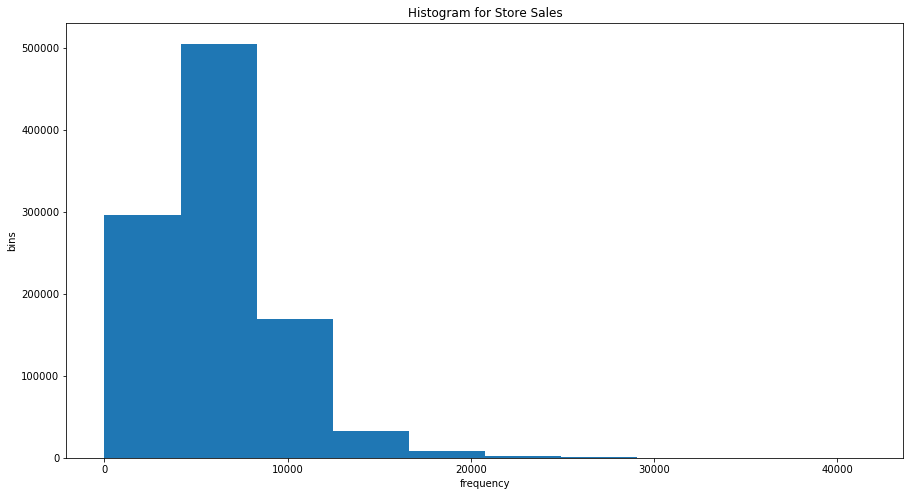

In [36]:
#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15, 8))
plt.hist(df['Sales'])
plt.title('Histogram for Store Sales')
plt.ylabel('bins')
plt.xlabel('frequency')
plt.show()

# Exploring Numeric Columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F593869D0>,
      dtype=object)

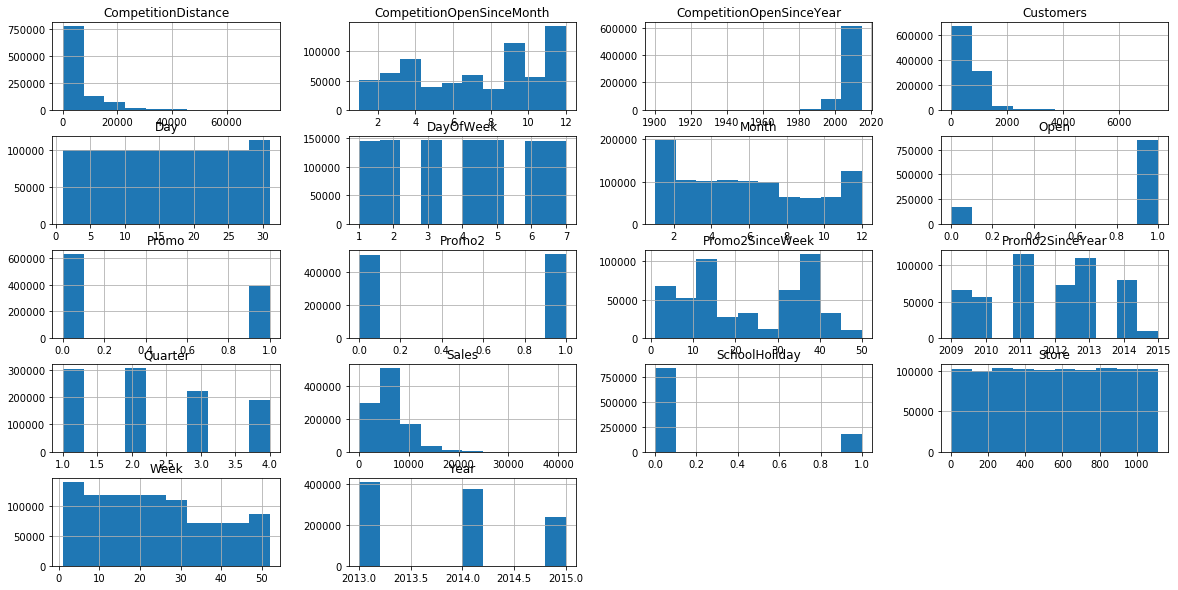

In [38]:
#Use the histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df.hist(figsize=(20, 10))